<font color='maroon' size=5A face="black body"> Get cleaned data </font>



In [4]:
%store -r dataframe 

<font color='maroon' size=5A face="black body"> Import packages </font>



In [5]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns
import plots


<br/><font color='gold' size=7A face="black body"> Classic and sequential A/B testing analysis </font><br/><br/>
<p> <font color='maroon' size=6A face="black body"> Sub tasks perform the following tasks </font></p>
    <ul>
    <li>Perform data exploration to count unique values of categorical variables, make histogram, relational, and other necessary plots to help understand the data. For each of the plots you produce, write a description of what the plot shows in markdown cells.</li>
    <li>Perform hypothesis testing: apply the classical p-value based algorithm and the  sequential A/B testing algorithm for which a starter code is provided.</li>
    <li>Are the number of data points in the experiment enough to make a reasonable judgement or should the company run a longer experiment? Remember that running the experiment longer may be costly for many reasons, so you should always optimize the number of samples to make a statistically sound decision.</li>
</ul>


In [6]:
numControls = dataframe.groupby('experiment').agg({'auction_id': 'count'})['auction_id']['control']
numExposed  = dataframe.groupby('experiment').agg({'auction_id': 'count'})['auction_id']['exposed']

print(f"From a total of {dataframe.shape[0]} we have {numControls} of control group and {numExposed} exposed groups")

From a total of 8077 we have 4071 of control group and 4006 exposed groups


In [5]:
dataframe.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


Number of exposed and control groups

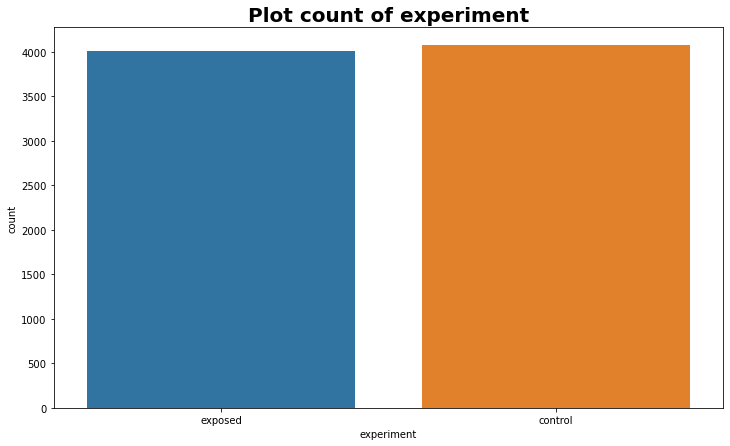

In [7]:
plots.plot_count(dataframe, 'experiment')

peopels who voted either voted YES or NO in either exposed or control  those who didn't

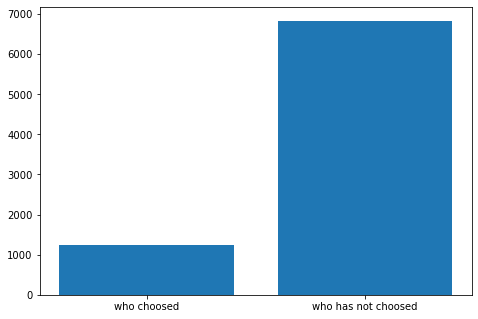

In [54]:
def BarAndHist(df,column,col):
    plots.plot_count(df, column)
    plots.plot_hist(df,column, col)
    

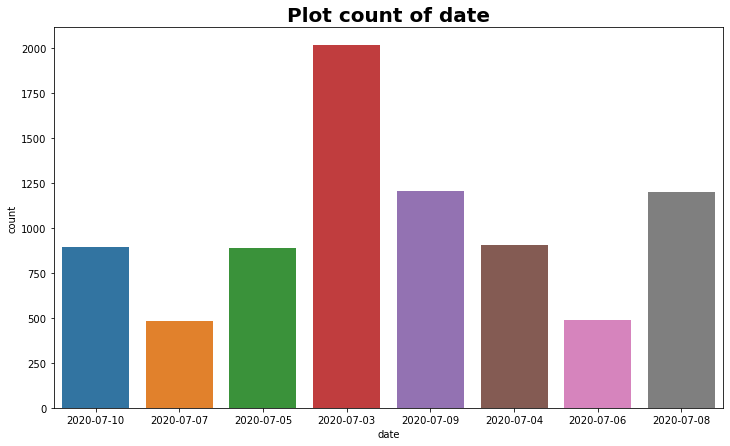

<Figure size 648x504 with 0 Axes>

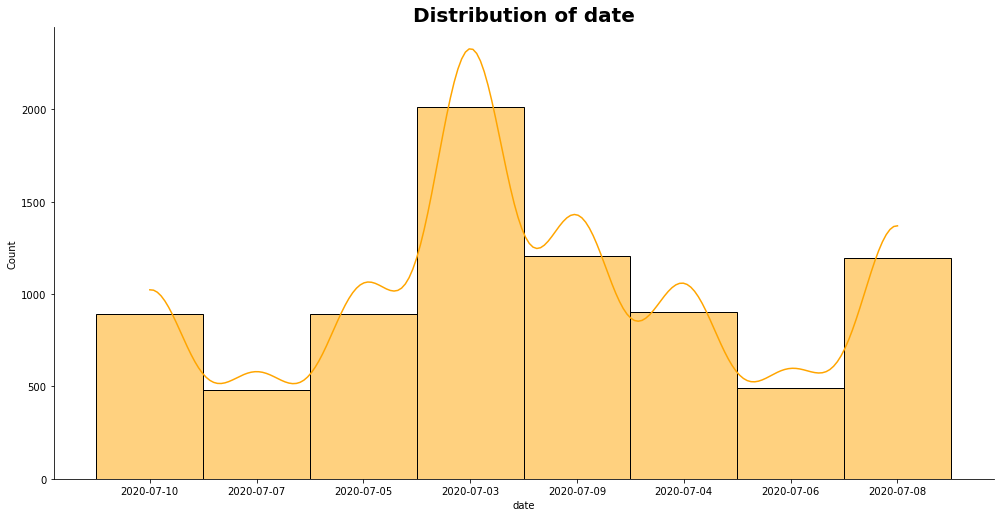

In [55]:
BarAndHist(dataframe,'date','orange')

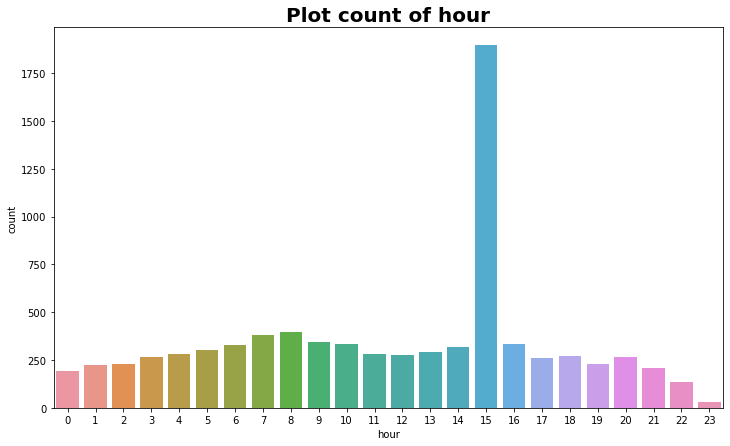

<Figure size 648x504 with 0 Axes>

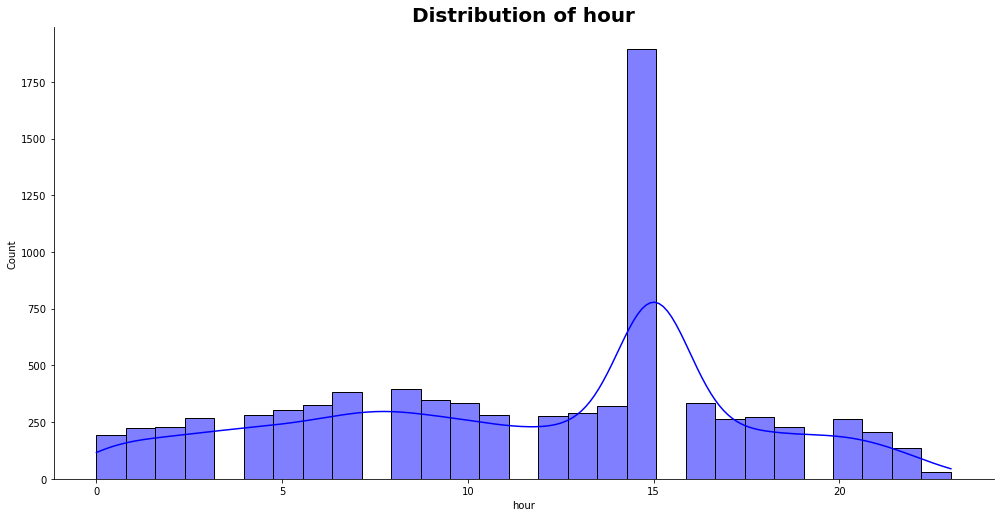

In [38]:
BarAndHist(dataframe,'hour','blue')

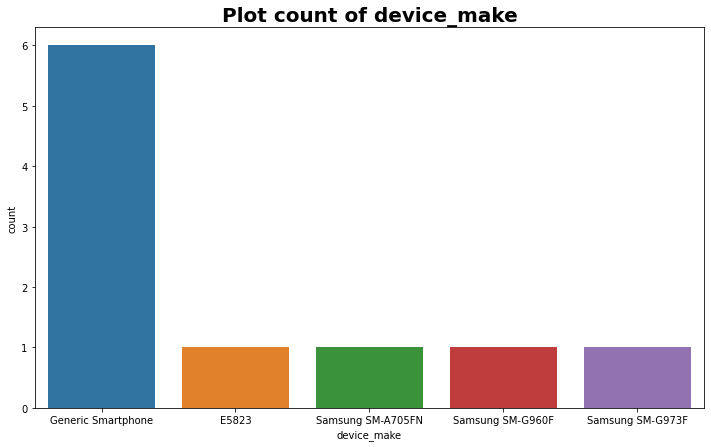

<Figure size 648x504 with 0 Axes>

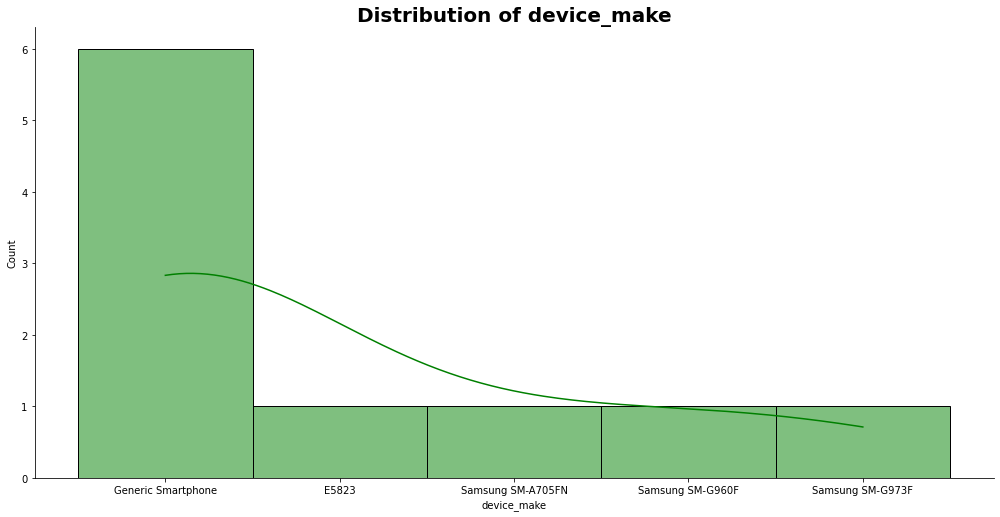

In [91]:
devicemaking = dataframe.groupby('device_make').agg({"device_make": 'count'})
devicemaking = devicemaking.rename(columns={'device_make': "Count of device"})
devicemaking = devicemaking.sort_values(by="Count of device", ascending= False)
BarAndHist(dataframe.head(10),'device_make','green')


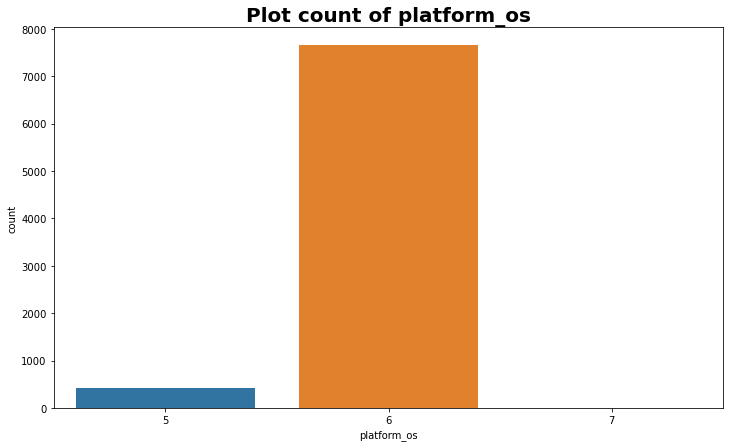

<Figure size 648x504 with 0 Axes>

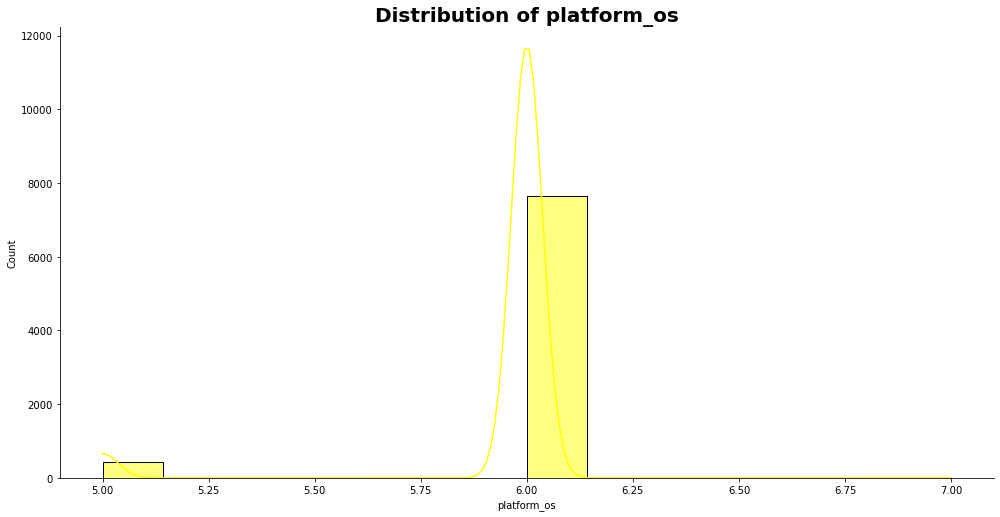

In [92]:
BarAndHist(dataframe,'platform_os','yellow')

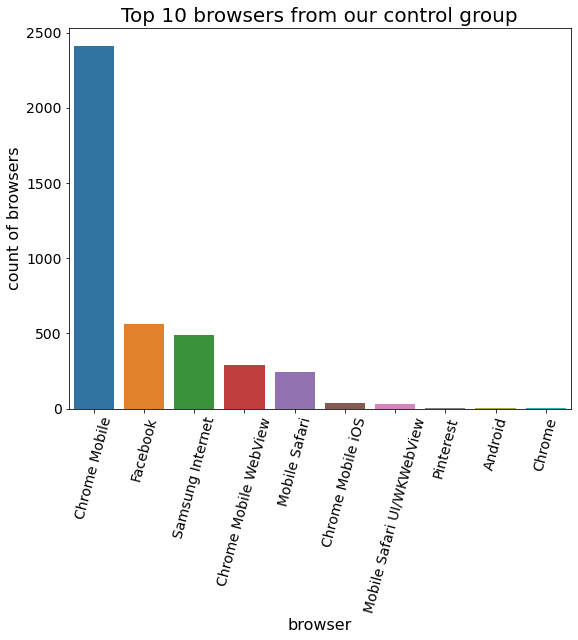

C:\Users\RND-04\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


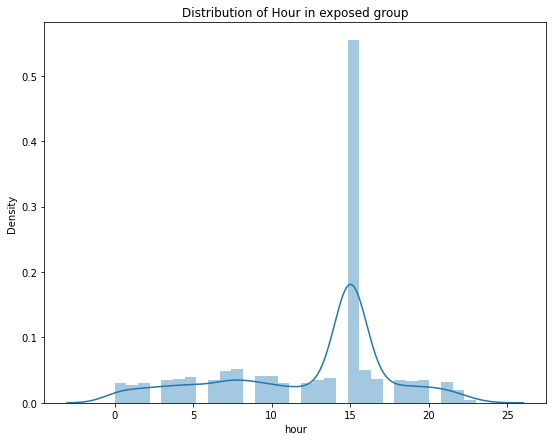

In [116]:
browser_control_df = dataframe[dataframe['experiment'] == "control"]
browser_control_df = browser_control_df[['browser', 'experiment']].sort_values(by="browser", ascending=False)
browser_control_df = browser_control_df.groupby('browser').agg({'browser': 'count'})
browser_control_df = browser_control_df.rename(columns={'browser': 'count of browsers'})
browser_control_df['browser'] = browser_control_df.index
browser_control_df = browser_control_df.sort_values(by="count of browsers", ascending=False)
# BarAndHist(browser_control_df.head(10),'browser','blue')
plots.plot_bar(browser_control_df.head(10), x_col='browser', y_col='count of browsers',
               title="Top 10 browsers from our control group", xlabel="browser", ylabel="count of browsers")

control_group = dataframe[dataframe['experiment'] == 'control']
plots.plot_dist(control_group['hour'], 'Hour in exposed group')


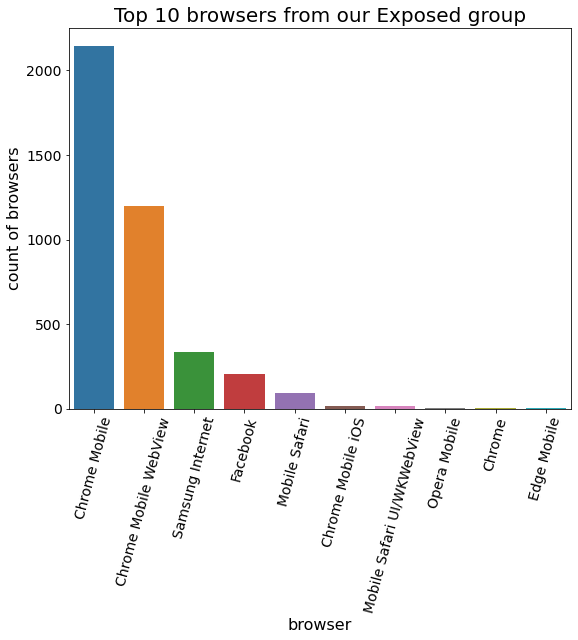

C:\Users\RND-04\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


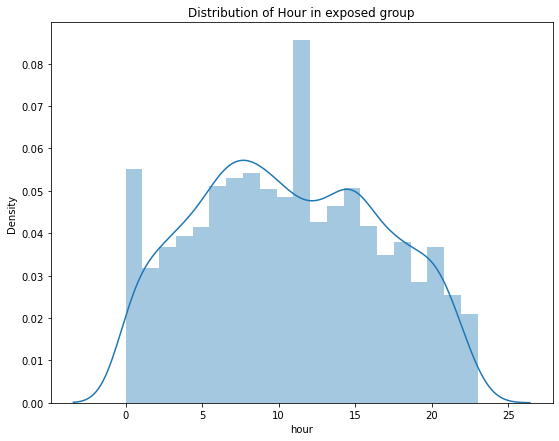

In [115]:
browser_control_df = dataframe[dataframe['experiment'] == "exposed"]
browser_control_df = browser_control_df[['browser', 'experiment']].sort_values(by="browser", ascending=False)
browser_control_df = browser_control_df.groupby('browser').agg({'browser': 'count'})
browser_control_df = browser_control_df.rename(columns={'browser': 'count of browsers'})
browser_control_df['browser'] = browser_control_df.index
browser_control_df = browser_control_df.sort_values(by="count of browsers", ascending=False)
# BarAndHist(browser_control_df.head(10),'browser','blue')
plots.plot_bar(browser_control_df.head(10), x_col='browser', y_col='count of browsers',
               title="Top 10 browsers from our Exposed group", xlabel="browser", ylabel="count of browsers")
exposed_group = dataframe[dataframe['experiment'] == 'exposed']
plots.plot_dist(exposed_group['hour'], 'Hour in exposed group')


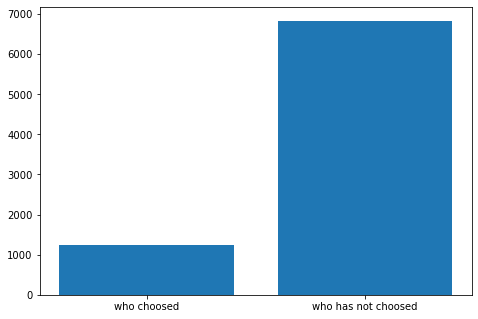

In [114]:
yes_no = dataframe.groupby('experiment').agg({'yes': 'sum', 'no': 'sum'})
yes_no_agg = yes_no.values.sum()
neither = dataframe.shape[0] - yes_no_agg
# print(yes_no_agg)
# print(neither)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sel = ['who choosed', 'who has not choosed']
choises = [yes_no_agg,neither]
ax.bar(sel,choises)
plt.show()

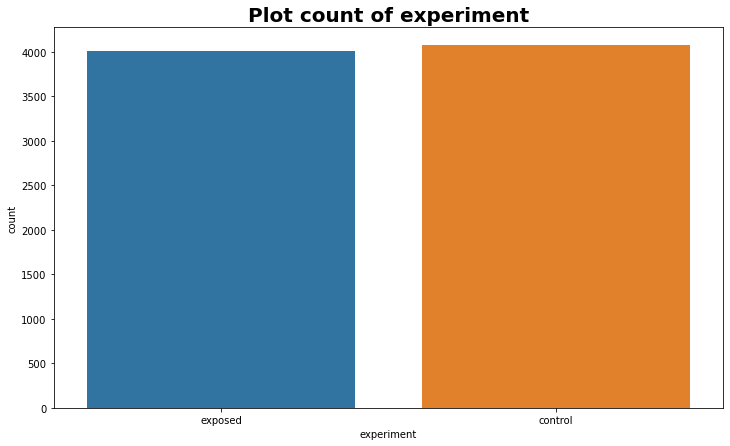

In [32]:
plots.plot_count(dataframe, 'experiment')

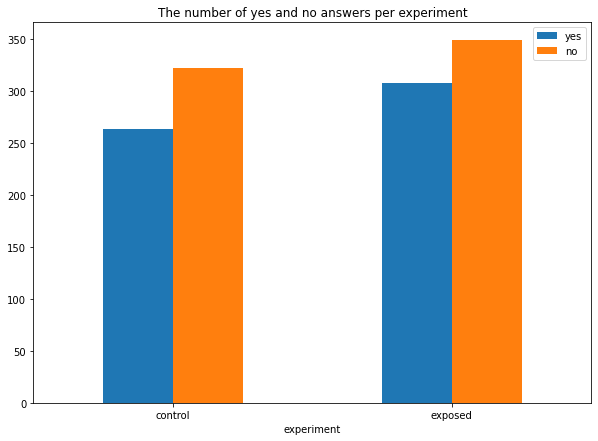

In [126]:
yes_no_agg = dataframe.groupby('experiment').agg({'yes': 'sum', 'no': 'sum'})
ax = yes_no_agg.plot.bar( y=['yes', 'no'],  title="The number of yes and no answers per experiment",
                          rot=0, figsize=(10,7))

variable correlation among the columns

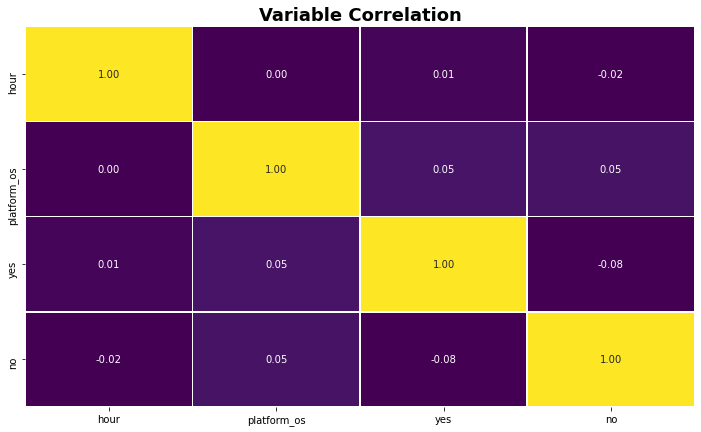

In [125]:
data = dataframe.copy()

data_correlation = data.drop('auction_id', axis=1).corr()
# data_correlation.head()
plots.plot_heatmap(data_correlation, 'Variable Correlation')
# data_correlation

Hypotesis Testing

In [128]:
cleaned_df = dataframe[['auction_id', 'experiment', 'yes', 'no']]
not_ans_df = cleaned_df.query("yes == 0 & no == 0")
not_ans_df

,auction_id,experiment,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,0,0
3,00187412-2932-4542-a8ef-3633901c98d9,control,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,0,0
...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,0,0


In [129]:
cleaned_df = cleaned_df.query("not (yes == 0 & no == 0)")
cleaned_df.groupby("experiment").agg({"yes": "sum", "no":"sum"})

cleaned_df_agg = cleaned_df.groupby("experiment").agg({"yes": "sum", "no":"sum"})
cleaned_df_agg['aware'] = [0,0]
cleaned_df_agg['aware']['control'] = cleaned_df_agg['yes']['control']
cleaned_df_agg['aware']['exposed'] = cleaned_df_agg['yes']['exposed']

cleaned_df_agg['total'] = [0, 0]
cleaned_df_agg['total']['control'] = cleaned_df_agg['yes']['control'] +  cleaned_df_agg['no']['control']
cleaned_df_agg['total']['exposed'] = cleaned_df_agg['yes']['exposed'] + cleaned_df_agg['no']['exposed']

print(f"number of pepole that are aware of the brand lux in control group are: {cleaned_df_agg['aware']['control']}")
print(f"number of pepole that are aware of the brand lux in exposed group are: {cleaned_df_agg['aware']['exposed']}")

test_df = cleaned_df_agg.copy()
test_df

number of pepole that are aware of the brand lux in control group are: 264
number of pepole that are aware of the brand lux in exposed group are: 308


,yes,no,aware,total
experiment,,,,
control,264,322,264,586
exposed,308,349,308,657


Conversion rate

In [130]:
control_conversion_rate = test_df['aware']['control'] / test_df['total']['control']
exposed_conversion_rate = test_df['aware']['exposed'] / test_df['total']['exposed']

print(f" The conversion rate of control group is {control_conversion_rate:0.2f}")
print(f" The conversion rate of exposed group is {exposed_conversion_rate:0.2f}")

 The conversion rate of control group is 0.45
 The conversion rate of exposed group is 0.47


Variance of the control and exposed groups

In [142]:
diff = exposed_conversion_rate - control_conversion_rate

variance_contorl = control_conversion_rate * (1 - control_conversion_rate)
variance_exposed = exposed_conversion_rate * (1 - exposed_conversion_rate)

In [143]:
contorl_total = cleaned_df_agg['total']['control']
exposed_total = cleaned_df_agg['total']['exposed']

standar_err_control = np.sqrt(variance_contorl)/np.sqrt(contorl_total)
standar_err_exposed = np.sqrt(variance_exposed)/np.sqrt(exposed_total)

In [144]:
shift  = (exposed_conversion_rate - control_conversion_rate) / control_conversion_rate

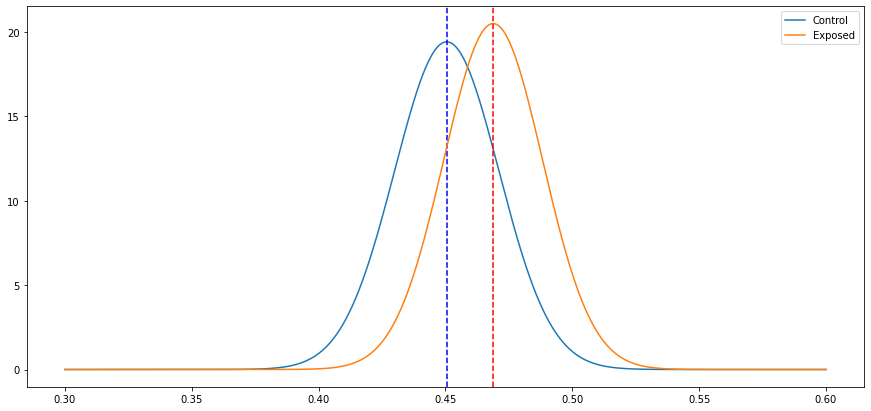

In [146]:
fig, ax = plt.subplots(figsize=(15,7))

x = np.linspace(0.3, 0.6, 1000)

ctr_rate_prob = scs.norm(control_conversion_rate, standar_err_control).pdf(x)
ax.plot(x, ctr_rate_prob, label='Control')
ax.axvline(x=control_conversion_rate, c='blue', linestyle='--')



exposed_rate_prob = scs.norm(exposed_conversion_rate, standar_err_exposed).pdf(x)
ax.plot(x, exposed_rate_prob, label='Exposed')
ax.axvline(x=exposed_conversion_rate, c='red', linestyle='--')
plt.legend()

In [150]:
print(f"The awareness of the exposed group has been shifted/increased by {shift * 100:0.2f}%" )

The awareness of the exposed group has been shifted/increased by 4.06%


Null hypotesis test to check if the increase in awarness is significant

In [151]:

def is_significant(A_rate, B_rate, A_total, B_total, alpha=0.05, tail="one"):
    diff = B_rate - A_rate
    
    A_variance =  A_rate * (1 - A_rate)
    B_variance  = B_rate * (1 - B_rate)
    
    z_score = diff / np.sqrt((A_variance/A_total) + (B_variance/B_total))

    p_value  = scs.norm().sf(z_score)
    
    if (tail == "one"):
        compare = alpha
    else:
        comapre = alpha / 2
        
    return abs(p_value) < alpha, p_value, z_score

In [152]:
alpha = 1 - 0.95

is_signi, p_value, z_score = is_significant(control_conversion_rate, exposed_conversion_rate,
                                            contorl_total, exposed_total, alpha=alpha)


z_score = diff / np.sqrt((variance_contorl/contorl_total) + (variance_exposed/exposed_total))
print (f"the calculated z score is {z_score:0.2f}" )

p_value  = scs.norm().sf(z_score)
print (f"the calculated p value is {p_value:0.2f}" )

is_signi, p_value, z_score = is_significant(control_conversion_rate, exposed_conversion_rate,
                                            contorl_total, exposed_total)

print(f"Is the value significant: {is_signi}")


the calculated z score is 0.65
the calculated p value is 0.26
Is the value significant: False


our P_value > 0.05, Our increase in awarness is not significant and we reject our alternative hypothesis. There is a high probablity that this could be due to chance or natural variation

The P value tells the probablity of getting the increase in awareness in the exposed group with 26%, but to say the increase in awarenss is significant we need it to be below 5%